# Analyzing IMDB Data in Keras

In [40]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [41]:
NUM_WORDS = 3000
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [42]:

print("x_train", sorted(set(x_train[0])))
print("y_train", y_train[0])

x_train [1, 2, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 28, 30, 32, 33, 35, 36, 38, 39, 43, 46, 48, 50, 51, 52, 56, 62, 65, 66, 71, 76, 77, 82, 87, 88, 92, 98, 100, 103, 104, 106, 107, 112, 113, 117, 124, 130, 134, 135, 141, 144, 147, 150, 167, 172, 173, 178, 192, 194, 215, 224, 226, 256, 283, 284, 297, 316, 317, 336, 381, 385, 386, 400, 407, 447, 458, 469, 476, 480, 515, 530, 546, 619, 626, 670, 723, 838, 973, 1029, 1111, 1247, 1334, 1385, 1415, 1622, 1920, 2025, 2071, 2223]
y_train 1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [43]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=NUM_WORDS)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test  = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])
print(x_train.shape)


[ 0.  1.  1. ...,  0.  0.  0.]
(25000, 3000)


In [44]:
x_train[0, :13]

array([ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.])

And we'll also one-hot encode the output.

In [45]:
# One-hot encoding the output
print("before", y_train[0])
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)
print("after", y_train[0])

before 1
(25000, 2)
(25000, 2)
after [ 0.  1.]


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [46]:
# TODO: Build the model architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
model = Sequential()
print("input_shape", x_train.shape[1])
model.add(Dense(100, input_shape=(x_train.shape[1], )))
model.add(Dropout(0.5))
model.add(Activation('tanh'))

model.add(Dense(16))
model.add(Dropout(0.5))
model.add(Activation('tanh'))

model.add(Dense(2))
model.add(Activation('softmax'))

# TODO: Compile the model using a loss function and an optimizer.
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

input_shape 3000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_258 (Dense)            (None, 100)               300100    
_________________________________________________________________
dropout_76 (Dropout)         (None, 100)               0         
_________________________________________________________________
activation_258 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_259 (Dense)            (None, 16)                1616      
_________________________________________________________________
dropout_77 (Dropout)         (None, 16)                0         
_________________________________________________________________
activation_259 (Activation)  (None, 16)                0         
_________________________________________________________________
dense_260 (Dense)            (None, 2)                 34  

## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [47]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
history = model.fit(x_train, y_train, epochs=20, batch_size=500, verbose=0)

dict_keys(['acc', 'loss'])


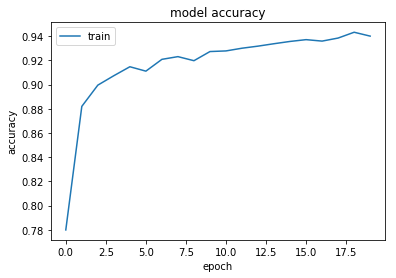

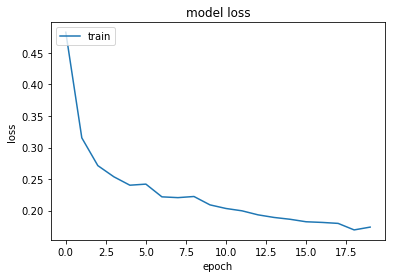

In [48]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

dict_keys(['val_loss', 'val_acc', 'acc', 'loss'])


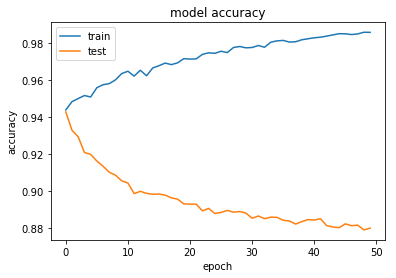

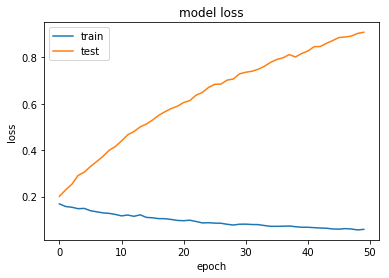

In [49]:
#model.compile(loss = 'binary_crossentropy', optimizer='adam', class_mode='binary', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.33, epochs=50, batch_size=500, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['mean_absolute_error', 'acc', 'val_acc', 'val_loss', 'loss', 'val_mean_absolute_error'])


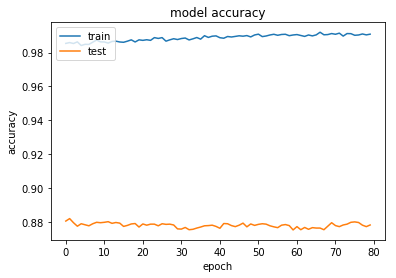

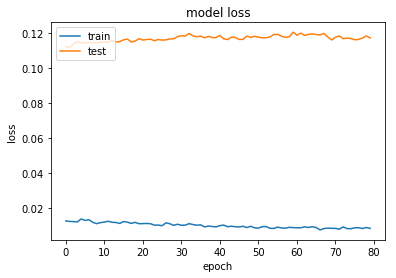

In [50]:
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mae', 'acc'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=80, batch_size=500, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

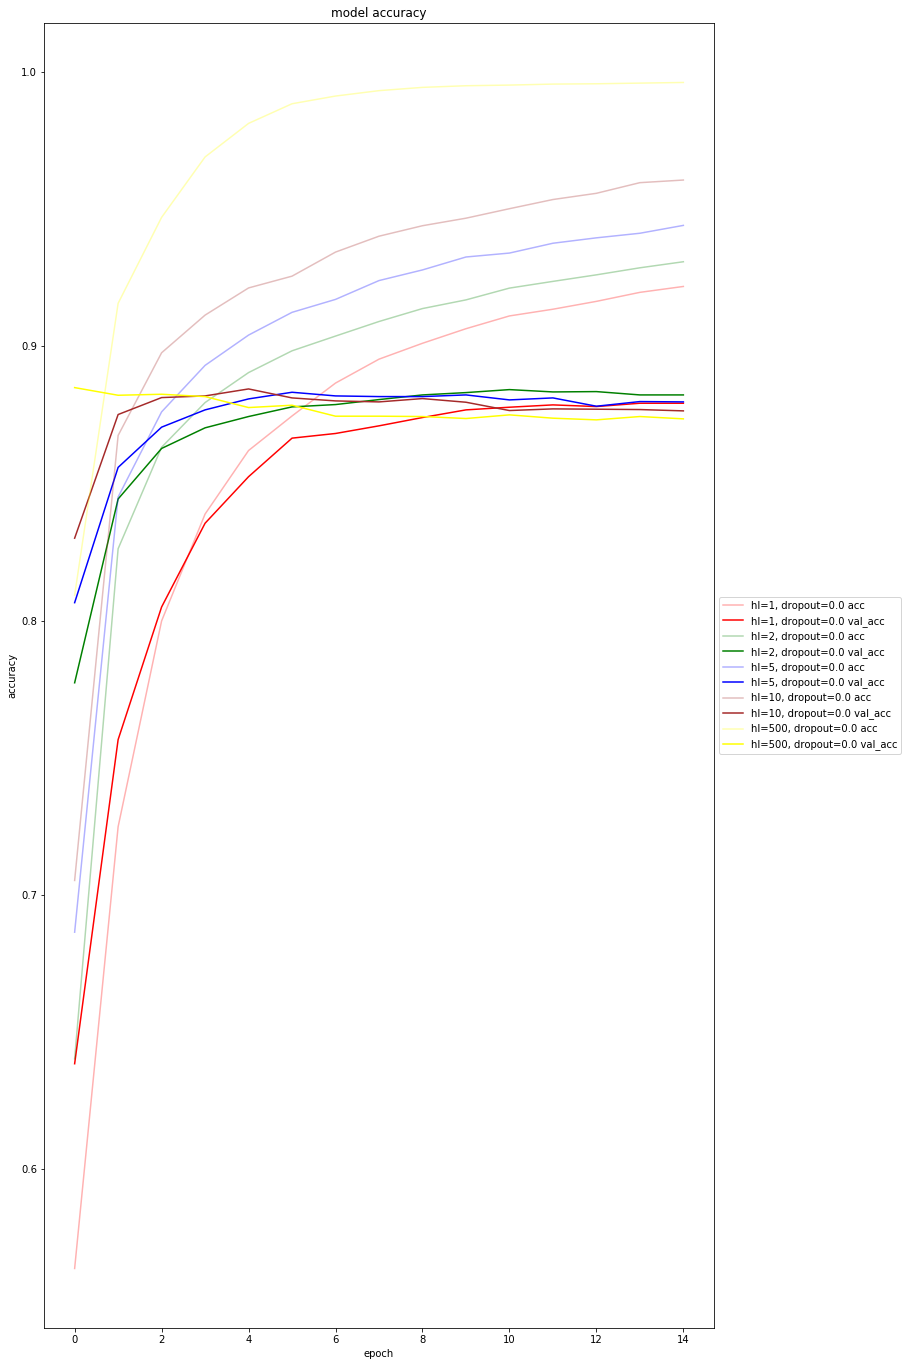

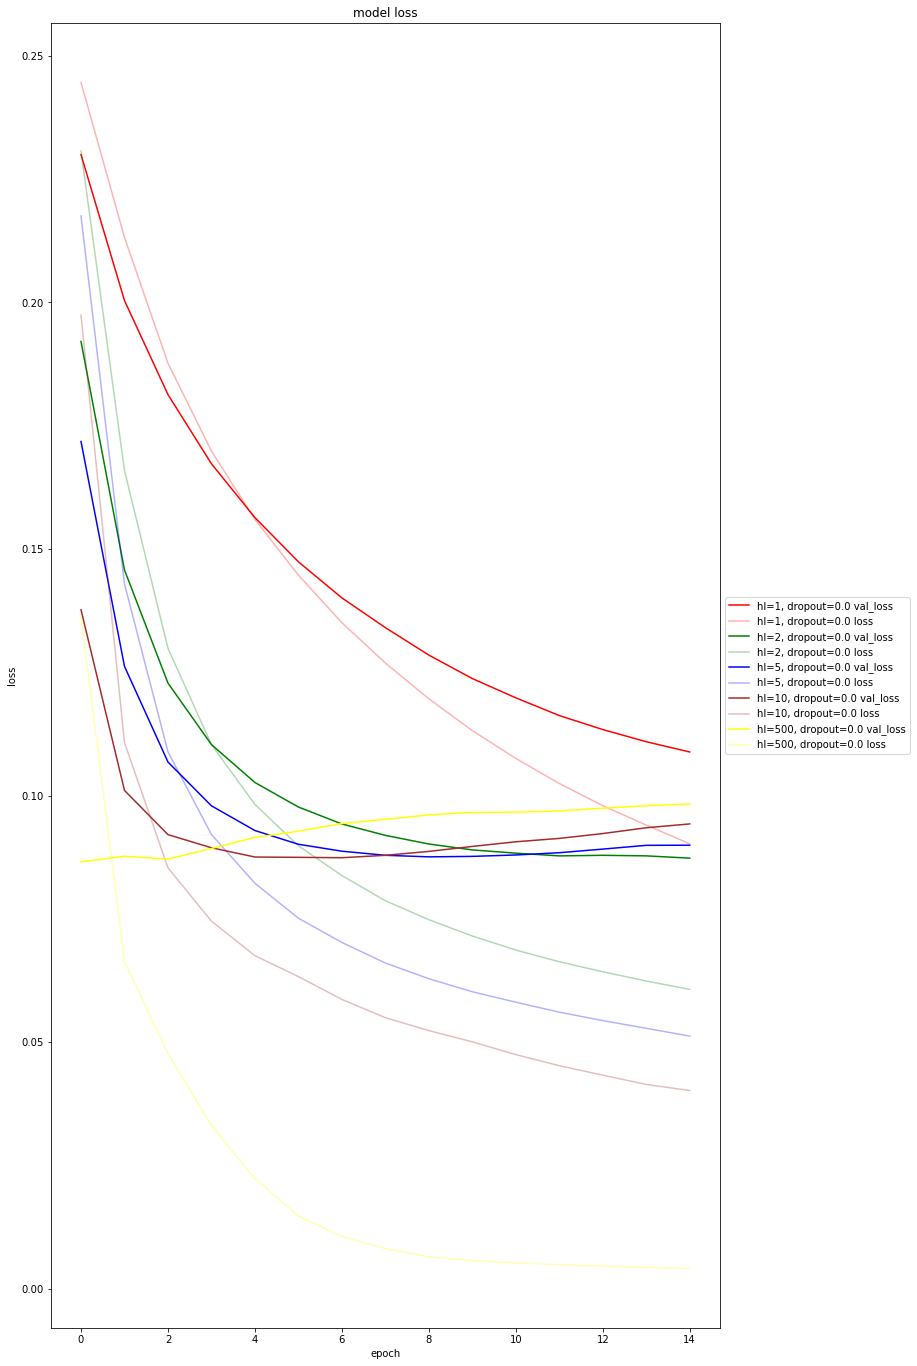

done


In [63]:
BATCH_SIZE = 500

HIDDEN_LAYER_NODES = [1, 2, 5, 10, 500]
DROPOUTS = [0.0] #, 0.3, 0.5]

COLORS = ['red', 'green', 'blue', 'brown', 'yellow', 'black', 'orange']
LINE_STYLES = ['-', '--', '-.',':']

results = []

for h_idx, hidden_layer_nodes in enumerate(HIDDEN_LAYER_NODES):
    for d_idx, dropout in enumerate(DROPOUTS):
        model = Sequential()

        model.add(Dense(hidden_layer_nodes, input_shape=(x_train.shape[1], )))
        model.add(Activation('relu'))
        
        if (dropout > 0.0):
            model.add(Dropout(dropout))

        model.add(Dense(2))
        model.add(Activation('softmax'))

# TODO: Compile the model using a loss function and an optimizer.
#model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        #model.summary()

        model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mae', 'acc'])
        history = model.fit(x_train, y_train, validation_split=0.33, epochs=15, shuffle=True, batch_size=BATCH_SIZE, verbose=0)

#        history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=BATCH_SIZE, verbose=0)



        # list all data in history
        #print(history.history.keys())
        #print("batch size", BATCH_SIZE)
        #print("h1 nodes #", hidden_layer_nodes)
        #print("dropout", dropout)

        results.append(["hl="+str(hidden_layer_nodes)+", dropout="+str(dropout), 
                        history, 
                        COLORS[(h_idx)%len(COLORS)],
                        LINE_STYLES[(d_idx%len(LINE_STYLES))]])

def plot(results, title, ylabel, xlabel, metrics):
    
    plt.figure(figsize=(12,24))
    
    for result in results:
        
        # summarize history for accuracy
        for metric, alpha in metrics.items():
            plt.plot(result[1].history[metric], 
                     color=result[2], 
                     alpha=alpha, 
                     linestyle=result[3], 
                     label=result[0]+" "+metric)
            
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.show()

plot(results, 'model accuracy', 'accuracy', 'epoch', {'acc': 0.3, 'val_acc': 1.0} )
plot(results, 'model loss', 'loss', 'epoch', {'loss': 0.3, 'val_loss': 1.0} )

print("done")

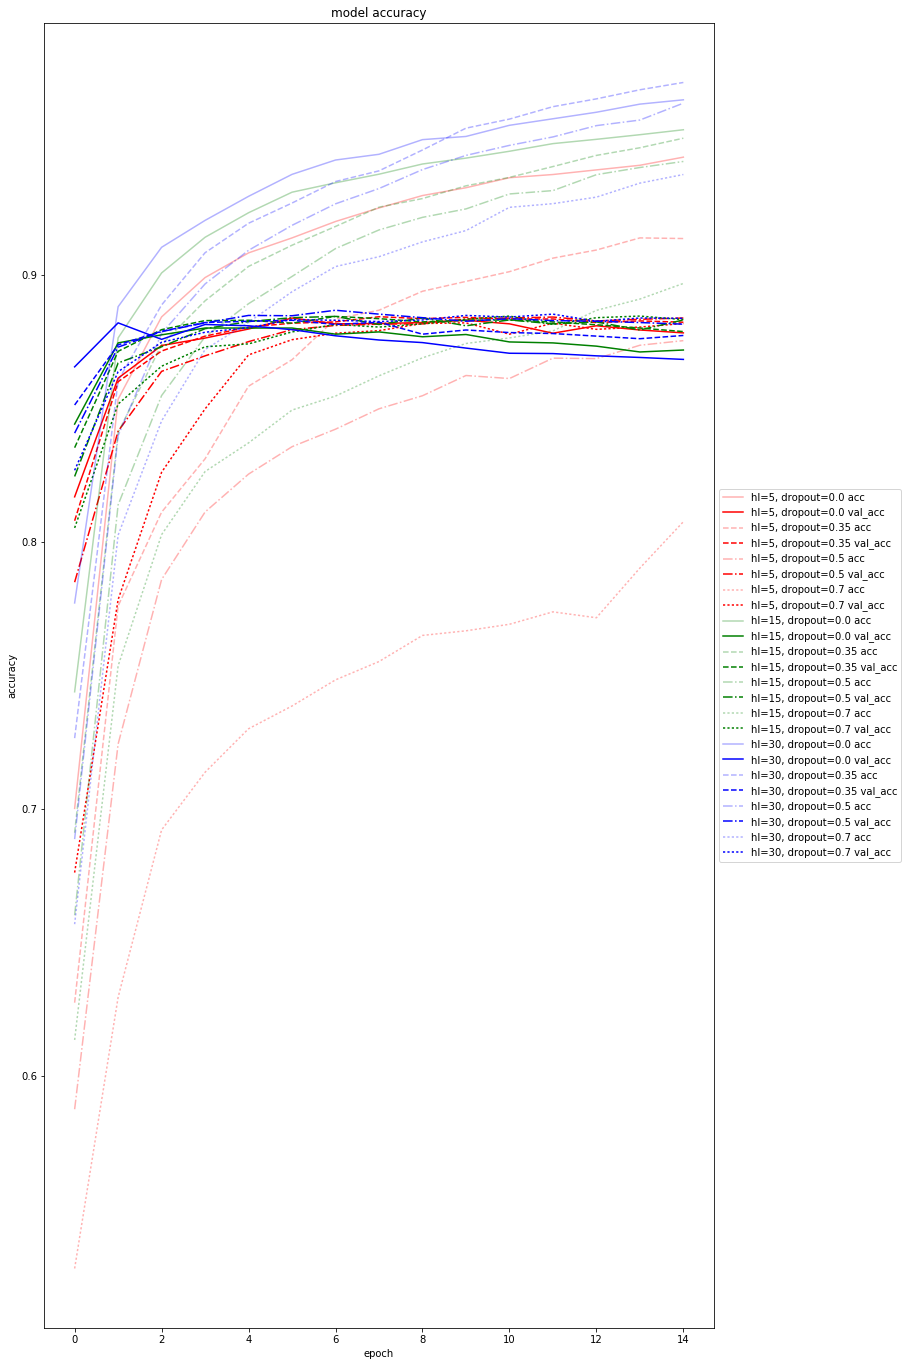

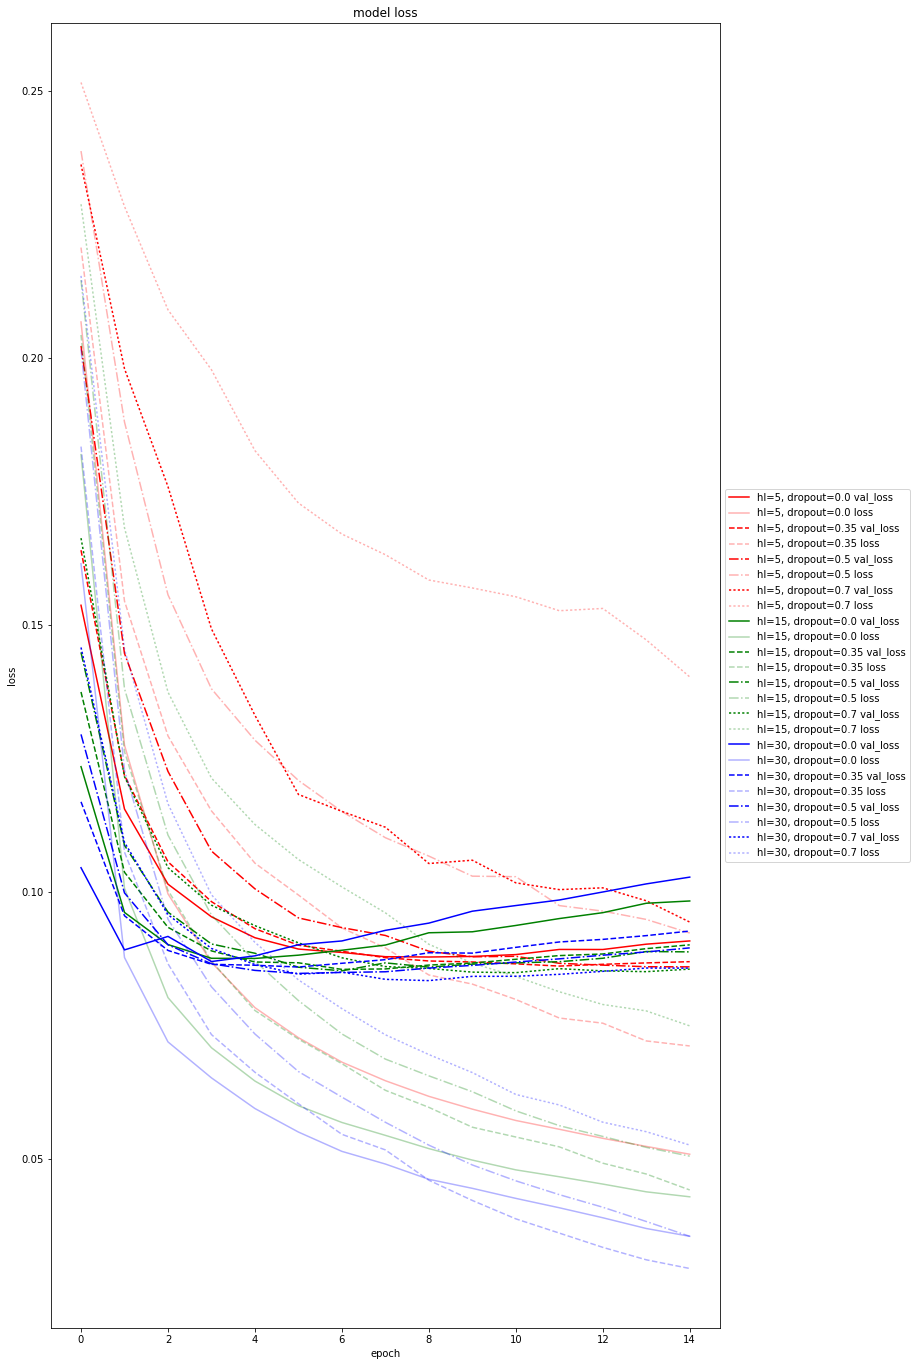

done


In [62]:
### STEP 2
BATCH_SIZE = 500

HIDDEN_LAYER_NODES = [5, 15, 30]
DROPOUTS = [0.0, 0.35, 0.5, 0.7] 

COLORS = ['red', 'green', 'blue', 'brown', 'yellow', 'black', 'orange']
LINE_STYLES = ['-', '--', '-.',':']

results = []

for h_idx, hidden_layer_nodes in enumerate(HIDDEN_LAYER_NODES):
    for d_idx, dropout in enumerate(DROPOUTS):
        model = Sequential()

        model.add(Dense(hidden_layer_nodes, input_shape=(x_train.shape[1], )))
        model.add(Activation('relu'))
        
        if (dropout > 0.0):
            model.add(Dropout(dropout))

        model.add(Dense(2))
        model.add(Activation('softmax'))

# TODO: Compile the model using a loss function and an optimizer.
#model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        #model.summary()

        model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mae', 'acc'])
        history = model.fit(x_train, y_train, validation_split=0.33, shuffle=True, epochs=15, batch_size=BATCH_SIZE, verbose=0)

#        history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=BATCH_SIZE, verbose=0)



        # list all data in history
        #print(history.history.keys())
        #print("batch size", BATCH_SIZE)
        #print("h1 nodes #", hidden_layer_nodes)
        #print("dropout", dropout)

        results.append(["hl="+str(hidden_layer_nodes)+", dropout="+str(dropout), 
                        history, 
                        COLORS[(h_idx)%len(COLORS)],
                        LINE_STYLES[(d_idx%len(LINE_STYLES))]])

def plot(results, title, ylabel, xlabel, metrics):
    
    plt.figure(figsize=(12,24))
    
    for result in results:
        
        # summarize history for accuracy
        for metric, alpha in metrics.items():
            data = result[1].history[metric]
            #mark = 0
            #for i in range(2, len(data)):
            #    diff_c = data[i] - data[i-1]
            #    diff_p = data[i-1] - data[i-2]
            #    if (diff_c > 0 and diff_p < 0) or \
            #       (diff_c < 0 and diff_p > 0):
            #            print("yep")
            #            mark = i
            #            break
            #plt.axvline(x=mark, color=result[2])
                    
            plt.plot(data, 
                     color=result[2], 
                     alpha=alpha, 
                     linestyle=result[3], 
                     label=result[0]+" "+metric)
            
            
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.show()

plot(results, 'model accuracy', 'accuracy', 'epoch', {'acc': 0.3, 'val_acc': 1.0} )
plot(results, 'model loss', 'loss', 'epoch', {'loss': 0.3, 'val_loss': 1.0} )

print("done")

In [59]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [60]:
model = Sequential()

model.add(Dense(5, input_shape=(x_train.shape[1], )))
model.add(Activation('relu'))
        
model.add(Dropout(0.5))
model.add(Dense(2))

model.add(Activation('softmax'))

model.summary()

model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mae', 'acc'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=20, shuffle=True, batch_size=250, verbose=0)

#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=500, verbose=0)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_335 (Dense)            (None, 5)                 15005     
_________________________________________________________________
activation_335 (Activation)  (None, 5)                 0         
_________________________________________________________________
dropout_99 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_336 (Dense)            (None, 2)                 12        
_________________________________________________________________
activation_336 (Activation)  (None, 2)                 0         
Total params: 15,017.0
Trainable params: 15,017.0
Non-trainable params: 0.0
_________________________________________________________________


In [61]:
score = model.evaluate(x_train, y_train, verbose=0)
print("train accuracy: ", score[2])

score = model.evaluate(x_test, y_test, verbose=0)
print("test accuracy: ", score[2])

train accuracy:  0.93604
test accuracy:  0.87068
